Source of data: https://www.kaggle.com/competitions/home-credit-default-risk/data \
files: application_train.csv, application_test.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer

In [2]:
train=pd.read_csv(r"C:\Users\olaki\Documents\Home-Credit-files\application_train.csv")
test=pd.read_csv(r"C:\Users\olaki\Documents\Home-Credit-files\application_test.csv")

In [40]:
pd.set_option('float_format', '{:.3f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# GLIMPSE OF DATA

In [4]:
print("Training dataset shape:",train.shape)
print('Test dataset shape:',test.shape)

Training dataset shape: (307511, 122)
Test dataset shape: (48744, 121)


In [5]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.500,24700.500,351000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019,-9461,-637,-3648.000,-2120,NaN,1,1,0,1,1,0,Laborers,1.000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083,0.263,0.139,0.025,0.037,0.972,0.619,0.014,0.000,0.069,0.083,0.125,0.037,0.020,0.019,0.000,0.000,0.025,0.038,0.972,0.634,0.014,0.000,0.069,0.083,0.125,0.038,0.022,0.020,0.000,0.000,0.025,0.037,0.972,0.624,0.014,0.000,0.069,0.083,0.125,0.037,0.021,0.019,0.000,0.000,reg oper account,block of flats,0.015,"Stone, brick",No,2.000,2.000,2.000,2.000,-1134.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.500,35698.500,1129500.000,Family,State servant,Higher education,Married,House / apartment,0.004,-16765,-1188,-1186.000,-291,NaN,1,1,0,1,1,0,Core staff,2.000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311,0.622,NaN,0.096,0.053,0.985,0.796,0.060,0.080,0.035,0.292,0.333,0.013,0.077,0.055,0.004,0.010,0.092,0.054,0.985,0.804,0.050,0.081,0.035,0.292,0.333,0.013,0.079,0.055,0.000,0.000,0.097,0.053,0.985,0.799,0.061,0.080,0.035,0.292,0.333,0.013,0.079,0.056,0.004,0.010,reg oper account,block of flats,0.071,Block,No,1.000,0.000,1.000,0.000,-828.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.000,6750.000,135000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010,-19046,-225,-4260.000,-2531,26.000,1,1,1,1,1,0,Laborers,1.000,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.556,0.730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

### unique ID

In [8]:
# unique applications
id_unique=train["SK_ID_CURR"].nunique()
print("Unique applicants: ", (id_unique/len(train["SK_ID_CURR"])*100),"%")

Unique applicants:  100.0 %


### deleting columns

Deleting columns that I don't think have any effect on default.

In [9]:
train.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START'],axis=1,inplace=True)
test.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START'],axis=1,inplace=True)

# Misssing values

In [10]:
def missing_values_df(df):
       # sum of missing values in each column
        mis_val = df.isna().sum()
        #percentage of missing values
        mis_val_percent = 100 * df.isna().sum() / len(df)
        
        #creating a daframe with above information
        mis_val_df = pd.DataFrame({"Missing values":mis_val,"Percentage of all values":mis_val_percent})
        
        mis_val_df=mis_val_df[mis_val_df['Missing values']!=0].sort_values(
                'Percentage of all values', ascending=False).round(1)

        return mis_val_df

In [13]:
missing_values = missing_values_df(train)
missing_values

,Missing values,Percentage of all values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [14]:
print("Amount of people who don't own the car: ",len(train[train['FLAG_OWN_CAR']=='N']))
print("Amount of missing values in own car age column: ",len(train[train['OWN_CAR_AGE'].isna()]))

Amount of people who don't own the car:  202924
Amount of missing values in own car age column:  202929


Deleting all columns related to the flat, cause they have too many missing values (more than 47%).

In [15]:
columns_AVG_MODE_MEDI_with_nan = [col for col in missing_values.index if any(word in col for word in ['AVG', 'MEDI', 'MODE'])]
train_clean=train.drop(columns=columns_AVG_MODE_MEDI_with_nan)
test_clean=test.drop(columns=columns_AVG_MODE_MEDI_with_nan)
missing_values.drop(columns_AVG_MODE_MEDI_with_nan, inplace=True)
print("Number of columns now: ",train_clean.shape[1])

Number of columns now:  72


In [16]:
train_clean.shape

(307511, 72)

## Missing values for test

In [17]:
missing_values_test=missing_values_df(test_clean)
missing_values_test

,Missing values,Percentage of all values
OWN_CAR_AGE,32312,66.3
EXT_SOURCE_1,20532,42.1
OCCUPATION_TYPE,15605,32.0
EXT_SOURCE_3,8668,17.8
AMT_REQ_CREDIT_BUREAU_YEAR,6049,12.4
AMT_REQ_CREDIT_BUREAU_HOUR,6049,12.4
AMT_REQ_CREDIT_BUREAU_QRT,6049,12.4
AMT_REQ_CREDIT_BUREAU_MON,6049,12.4
AMT_REQ_CREDIT_BUREAU_WEEK,6049,12.4
AMT_REQ_CREDIT_BUREAU_DAY,6049,12.4


# Column types

In [18]:
train_clean.dtypes.value_counts()

int64      39
float64    22
object     11
dtype: int64

In [19]:
train_clean.dtypes[train.dtypes == 'object']

NAME_CONTRACT_TYPE     object
CODE_GENDER            object
FLAG_OWN_CAR           object
FLAG_OWN_REALTY        object
NAME_TYPE_SUITE        object
NAME_INCOME_TYPE       object
NAME_EDUCATION_TYPE    object
NAME_FAMILY_STATUS     object
NAME_HOUSING_TYPE      object
OCCUPATION_TYPE        object
ORGANIZATION_TYPE      object
dtype: object

In [20]:
train_clean.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE      2
CODE_GENDER             3
FLAG_OWN_CAR            2
FLAG_OWN_REALTY         2
NAME_TYPE_SUITE         7
NAME_INCOME_TYPE        8
NAME_EDUCATION_TYPE     5
NAME_FAMILY_STATUS      6
NAME_HOUSING_TYPE       6
OCCUPATION_TYPE        18
ORGANIZATION_TYPE      58
dtype: int64

# Visualizing categorical data

### Visualizing most of categorical data.

In [21]:
# creating dataframe with categorical data
categorical_data=train_clean[train_clean.dtypes[train_clean.dtypes == 'object'].index]
categorical_data=pd.concat([categorical_data, train_clean.loc[:, train_clean.columns.isin(["FLAG_DOCUMENT_{}".format(i) for i in range(2, 22)])]], axis=1)

print("Number of column FLAG_MOBIL: ",train_clean.columns.get_loc("FLAG_MOBIL"))
print("Number of column REG_REGION_NOT_LIVE_REGION: ",train_clean.columns.get_loc("REG_REGION_NOT_LIVE_REGION"))
print("Number of column REGION_RATING_CLIENT: ",train_clean.columns.get_loc("REGION_RATING_CLIENT"))

categorical_data=pd.concat([categorical_data,train_clean.iloc[:,list(range(21, 27)) + list(range(29, 37)) ] ])

categorical_data.head()

Number of column FLAG_MOBIL:  21
Number of column REG_REGION_NOT_LIVE_REGION:  31
Number of column REGION_RATING_CLIENT:  29


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Business Entity Type 3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,School,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Government,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,Business Entity Type 3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,Religion,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
def grid_of_countplots(df):
    cols = 2
    rows = int(df.shape[1]/cols)
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 150))
    sns.set(style="darkgrid")
    for r in range(rows):
        for c in range(cols):
            idx = r*cols + c
            sns.countplot(data=df, x=df.iloc[:,idx], ec = "blue",palette="viridis",ax=ax[r,c])
            ax[r,c].set_title(df.iloc[:,idx].name)
           
    #plt.subplots_adjust(hspace = 1, wspace = 0.2)        
    plt.tight_layout()
    plt.show()
     

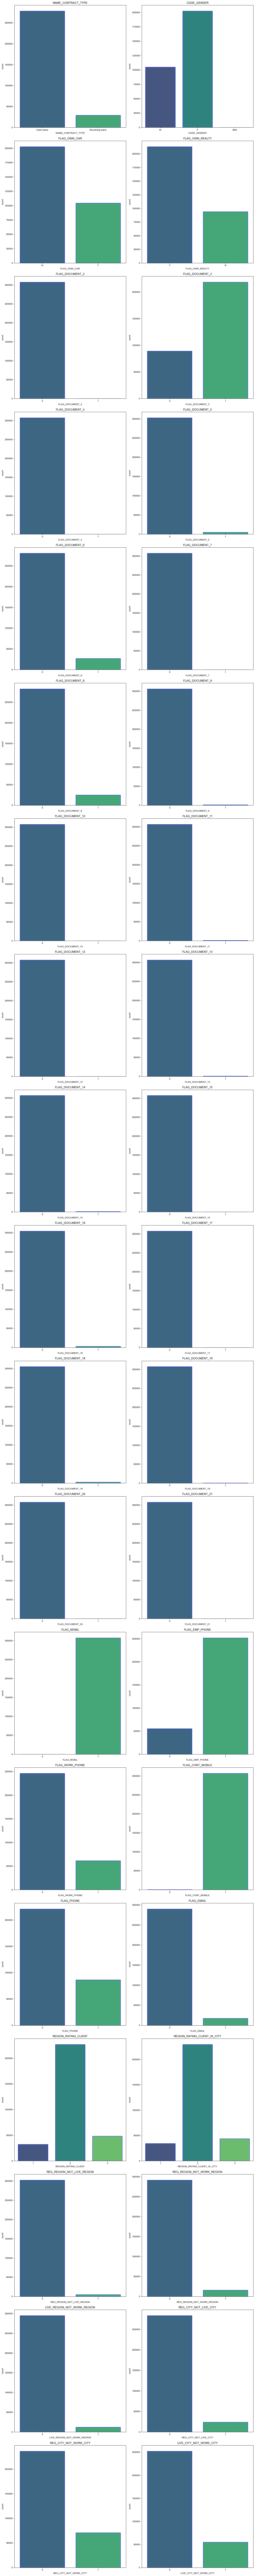

In [23]:
#choosing columns with number of unique values less than 5
nunique_under_5_categorical=train_clean[[col for col in categorical_data if categorical_data[col].nunique() < 5]]
grid_of_countplots(nunique_under_5_categorical)   

### Countplots of rest of the categorical data

In [25]:
nunique_more_5_categorical=train_clean[[col for col in categorical_data if train_clean[col].nunique() > 5]]
nunique_more_5_categorical.head()

,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE
0,Unaccompanied,Working,Single / not married,House / apartment,Laborers,Business Entity Type 3
1,Family,State servant,Married,House / apartment,Core staff,School
2,Unaccompanied,Working,Single / not married,House / apartment,Laborers,Government
3,Unaccompanied,Working,Civil marriage,House / apartment,Laborers,Business Entity Type 3
4,Unaccompanied,Working,Single / not married,House / apartment,Core staff,Religion


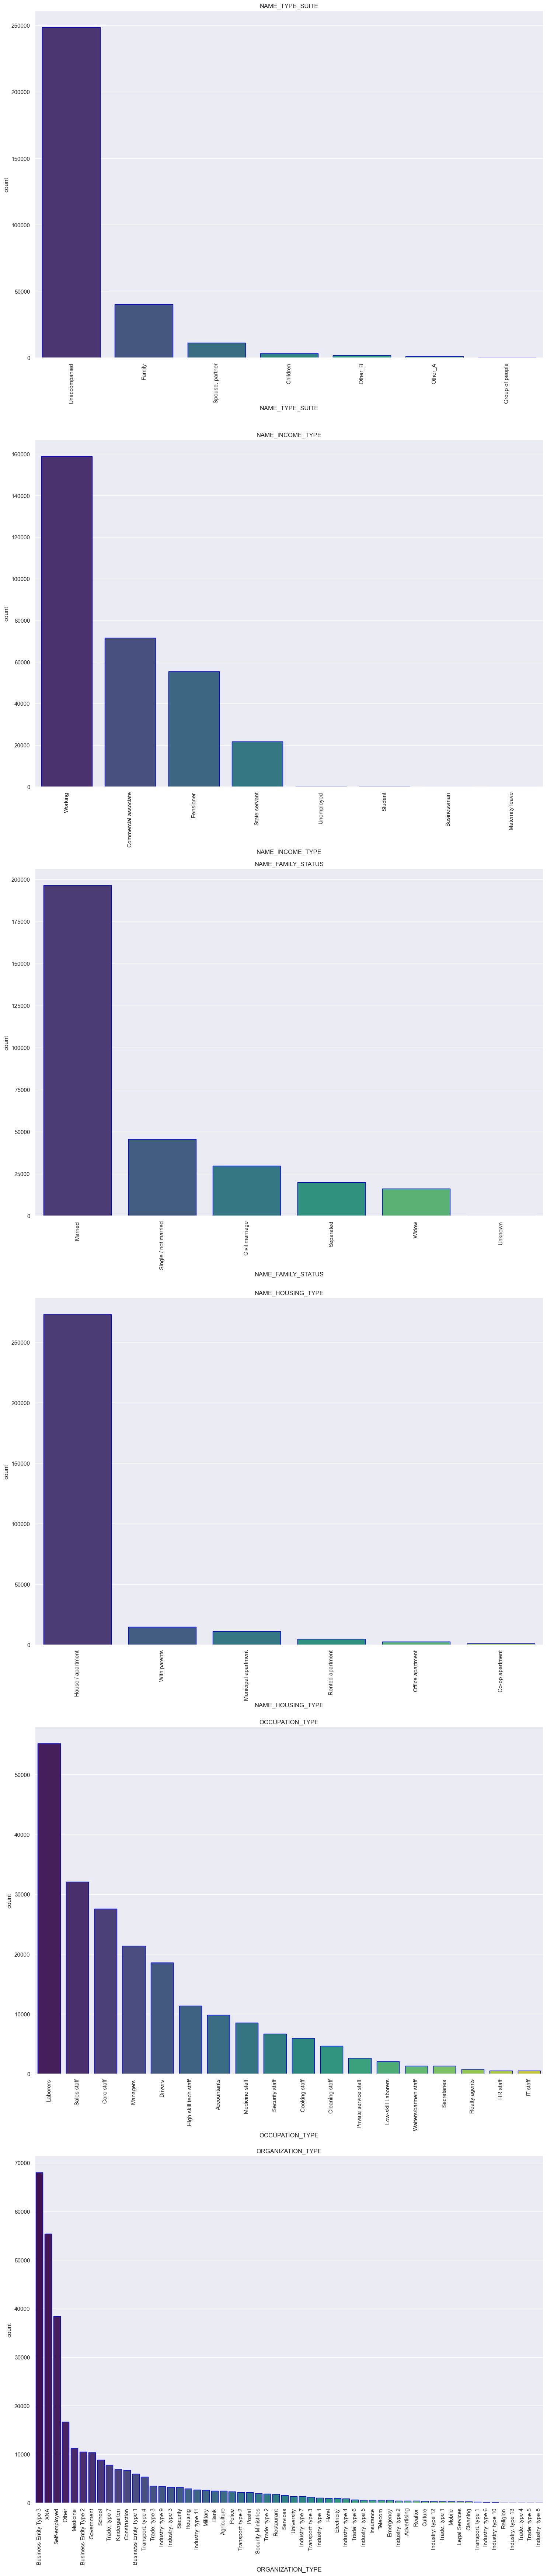

In [26]:
nunique_more_5_categorical=train_clean[[col for col in categorical_data if train_clean[col].nunique() > 5]]
fig, ax = plt.subplots(nrows=len(nunique_more_5_categorical.columns), ncols=1, figsize=(15, 70))
for number,i in enumerate(nunique_more_5_categorical.columns):
    sns.countplot(data=nunique_more_5_categorical, x=nunique_more_5_categorical[i], order = nunique_more_5_categorical.iloc[:,number].value_counts().index,ec = "blue",palette="viridis",ax=ax[number])
    ax[number].set_title(i)
    ax[number].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()


# Outliers

In [27]:
#creating dataframe with numerical data
numerical_data=train_clean.loc[:,~train_clean.columns.isin(categorical_data.columns)]
numerical_data=numerical_data.loc[:,numerical_data.columns!="TARGET"]
numerical_data.head()


,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,NaN,1.0,0.083037,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,NaN,2.0,0.311267,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,26.0,1.0,NaN,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,NaN,2.0,NaN,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,NaN,1.0,NaN,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
def grid_of_boxplots(df):
    cols = 2
    rows = int(np.ceil(df.shape[1]/cols))
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 100))
    for number, name in enumerate(df.columns):
        row=number//2
        col=number%2
        sns.boxplot(data=df, x=df[name],ax=ax[row,col])
        ax[row,col].set_title(name)        
    plt.tight_layout()
    plt.show()

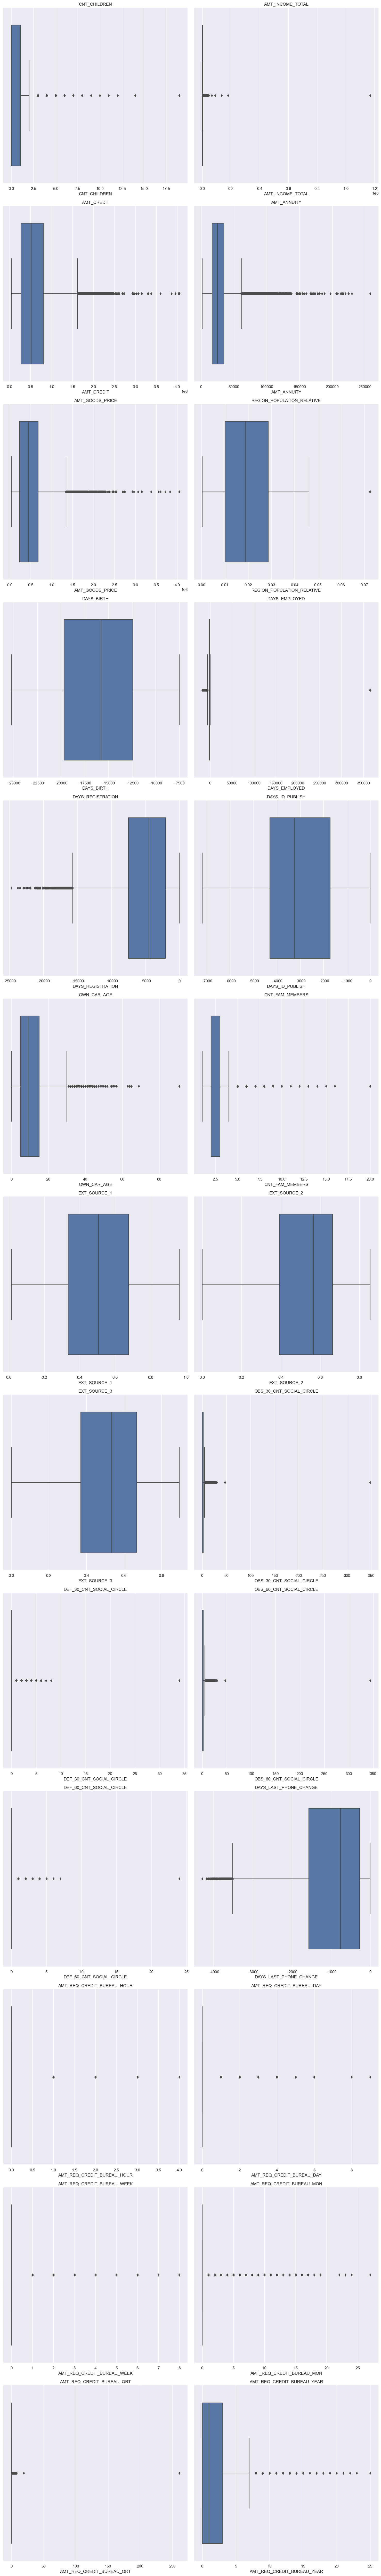

In [29]:
grid_of_boxplots(numerical_data)

In [30]:
len(numerical_data["AMT_ANNUITY"])

307511

In [53]:
def find_outliers_IQR(df):
   Q1=[]
   Q3=[]
   IQR=[]
   outliers=[]
   median=[]
   min=[]
   max=[]
   mean=[]
   percentage_outliers=[]
   for i in df.columns:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    out = len(df[((df[i]<(q1-1.5*iqr)) | (df[i]>(q3+1.5*iqr)))])
    per=np.round(out/len(df[i])*100,2)
    Q1.append(q1)
    Q3.append(q3)
    IQR.append(iqr)
    median.append(df[i].quantile(0.5))
    min.append(df[i].min())
    max.append(df[i].max())
    mean.append(df[i].mean())
    outliers.append(out)
    percentage_outliers.append(per)
   df_outliers=pd.DataFrame({"min":min,"max":max,"mean":mean,"quartile 1":Q1,"median":median, "quartile 3":Q3,"IQR":IQR,"number of outliers":outliers,"percentage of outliers":percentage_outliers}, index=df.columns)
   return df_outliers.sort_values("percentage of outliers",ascending=False)

In [54]:
find_outliers_IQR(numerical_data)

,min,max,mean,quartile 1,median,quartile 3,IQR,number of outliers,percentage of outliers
DAYS_EMPLOYED,-17912.000,365243.000,63815.046,-2760.000,-1213.000,-289.000,2471.000,72217,23.480
AMT_REQ_CREDIT_BUREAU_QRT,0.000,261.000,0.265,0.000,0.000,0.000,0.000,50575,16.450
AMT_REQ_CREDIT_BUREAU_MON,0.000,27.000,0.267,0.000,0.000,0.000,0.000,43759,14.230
DEF_30_CNT_SOCIAL_CIRCLE,0.000,34.000,0.143,0.000,0.000,0.000,0.000,35166,11.440
DEF_60_CNT_SOCIAL_CIRCLE,0.000,24.000,0.100,0.000,0.000,0.000,0.000,25769,8.380
OBS_30_CNT_SOCIAL_CIRCLE,0.000,348.000,1.422,0.000,0.000,2.000,2.000,19971,6.490
OBS_60_CNT_SOCIAL_CIRCLE,0.000,344.000,1.405,0.000,0.000,2.000,2.000,19564,6.360
AMT_GOODS_PRICE,40500.000,4050000.000,538396.207,238500.000,450000.000,679500.000,441000.000,14728,4.790
AMT_INCOME_TOTAL,25650.000,117000000.000,168797.919,112500.000,147150.000,202500.000,90000.000,14035,4.560
AMT_REQ_CREDIT_BUREAU_WEEK,0.000,8.000,0.034,0.000,0.000,0.000,0.000,8536,2.780


# Visualization

### Target column - balanced or not?

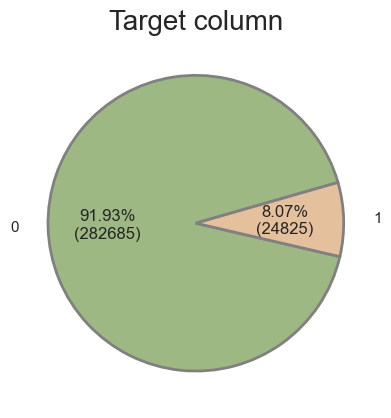

In [33]:
colors = ['#9DB882', '#E4C09D']
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.2f}%\n({:d})".format(pct, absolute)

plt.pie(train["TARGET"].value_counts(), labels=['0','1'], autopct = lambda pct: func(pct, train["TARGET"].value_counts()),
        labeldistance=1.2, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'grey' }, colors=colors,
        startangle = 16)
plt.title("Target column",fontsize=20)
plt.show()

As we can see, there is a high imbalance between the two clasess. I propably will oversample the data.

# CLEANING DATA

## Dealing with missing values

In [34]:
missing_values

,Missing values,Percentage of all values
OWN_CAR_AGE,202929,66.0
EXT_SOURCE_1,173378,56.4
OCCUPATION_TYPE,96391,31.3
EXT_SOURCE_3,60965,19.8
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.5
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.5
AMT_REQ_CREDIT_BUREAU_MON,41519,13.5
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.5
AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.5
AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.5


In [35]:
missing_values_test

,Missing values,Percentage of all values
OWN_CAR_AGE,32312,66.3
EXT_SOURCE_1,20532,42.1
OCCUPATION_TYPE,15605,32.0
EXT_SOURCE_3,8668,17.8
AMT_REQ_CREDIT_BUREAU_YEAR,6049,12.4
AMT_REQ_CREDIT_BUREAU_HOUR,6049,12.4
AMT_REQ_CREDIT_BUREAU_QRT,6049,12.4
AMT_REQ_CREDIT_BUREAU_MON,6049,12.4
AMT_REQ_CREDIT_BUREAU_WEEK,6049,12.4
AMT_REQ_CREDIT_BUREAU_DAY,6049,12.4


In [36]:
train_clean[train_clean["DAYS_LAST_PHONE_CHANGE"].isna()] # applicant has work phone, so I change DAYS_LAST_PHONE_CHANGE to median

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
15709,0,Cash loans,M,Y,Y,0,126000.0,278613.0,25911.0,252000.0,Unaccompanied,Working,Incomplete higher,Married,House / apartment,0.010643,-8574,-293,-4790.0,-1075,21.0,0,1,0,1,0,0,NaN,2.0,2,2,0,0,0,0,0,0,Trade: type 3,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# almost all of the missing values is because loan applicant don't have a car
# missing values in CNT_FAM_MEMBERS I'm changing to 0
train_clean[["OWN_CAR_AGE","CNT_FAM_MEMBERS"]]=train_clean[["OWN_CAR_AGE","CNT_FAM_MEMBERS"]].fillna(0) 
test_clean["OWN_CAR_AGE"]=test_clean["OWN_CAR_AGE"].fillna(0) 

train_clean["OCCUPATION_TYPE"]=train_clean["OCCUPATION_TYPE"].fillna("Unemployed") 
test_clean["OCCUPATION_TYPE"]=test_clean["OCCUPATION_TYPE"].fillna("Unemployed") 

#changing missing values in EXT_SOURCE and DAYS_LAST_PHONE_CHANGE to their median
imputer = SimpleImputer(strategy='median')
train_clean[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_LAST_PHONE_CHANGE']] = imputer.fit_transform(train_clean[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_LAST_PHONE_CHANGE']])
test_clean[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']] = imputer.fit_transform(test_clean[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']])

AMT_REQ_CREDIT_BUREU_AND_SOCIAL_CIRCLE=[col for col in train_clean.columns if "AMT_REQ_CREDIT_BUREAU" in col or "_CNT_SOCIAL_CIRCLE" in col]
train_clean[AMT_REQ_CREDIT_BUREU_AND_SOCIAL_CIRCLE]=train_clean[AMT_REQ_CREDIT_BUREU_AND_SOCIAL_CIRCLE].fillna(-1)   
test_clean[AMT_REQ_CREDIT_BUREU_AND_SOCIAL_CIRCLE]=test_clean[AMT_REQ_CREDIT_BUREU_AND_SOCIAL_CIRCLE].fillna(-1)  
#-1 cause I want to know this was missing value

train_clean["NAME_TYPE_SUITE"]=train_clean["NAME_TYPE_SUITE"].fillna(train_clean["NAME_TYPE_SUITE"].mode()[0]) # most frequent value
test_clean["NAME_TYPE_SUITE"]=test_clean["NAME_TYPE_SUITE"].fillna(test_clean["NAME_TYPE_SUITE"].mode()[0]) 

train_clean["AMT_GOODS_PRICE"]=train_clean["AMT_GOODS_PRICE"].fillna(train_clean["AMT_GOODS_PRICE"].quantile(0.25))  # 1st quartile


### KNN Imputation fot AMT_ANNUITY

In [38]:
imputerKNN=KNNImputer(n_neighbors=5)

train_clean_for_KNNimputation=train_clean.iloc[:,6:10].copy()
test_clean_for_KNNimputation=train_clean.iloc[:,5:9].copy()

train_clean_2_imputed=imputerKNN.fit_transform(train_clean_for_KNNimputation)
test_clean_2_imputed=imputerKNN.fit_transform(test_clean_for_KNNimputation)

train_clean_2_imputed=pd.DataFrame(train_clean_2_imputed,columns=train_clean_for_KNNimputation.columns)
test_clean_2_imputed=pd.DataFrame(test_clean_2_imputed,columns=test_clean_for_KNNimputation.columns)

train_clean["AMT_ANNUITY"]=train_clean_2_imputed["AMT_ANNUITY"]
test_clean["AMT_ANNUITY"]=test_clean_2_imputed["AMT_ANNUITY"]

In [39]:
if missing_values_df(train_clean).empty and missing_values_df(test_clean).empty:
    print("There are no more missing values in both datasets.")
else:
    print("There is some more missing values.")
    print(missing_values_df(train_clean))

There are no more missing values in both datasets.


In [147]:
if missing_values_df(train_clean).empty and missing_values_df(test_clean).empty:
    print("There are no more missing values in both datasets.")
elif not missing_values_df(train_clean).empty and not missing_values_df(test_clean).empty:
    print("There is some more missing values in both datasets.")
    print(missing_values_df(train_clean))
    print(missing_values_df(test_clean))
elif not missing_values_df(train_clean).empty:
    print("There is some more missing values in train dataset.")  
    print(missing_values_df(train_clean))  
else:
    print("There is some more missing values in test dataset.") 
    print(missing_values_df(test_clean))  

There are no more missing values in both datasets.


## Dealing with outliers

In [142]:
def outliers_IQR(df):
   df=df.copy()
   for i in df.columns:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    lower_boundary=q1-1.5*iqr
    higher_boundary=q3+1.5*iqr
    outliers=df[((df[i]<(q1-1.5*iqr)) | (df[i]>(q3+1.5*iqr)))].index
    
    df.loc[outliers, i] = df.loc[outliers, i].apply(lambda x: lower_boundary if x < lower_boundary else (higher_boundary if x > higher_boundary else x))
   return df

Replacing outliers with 1st quartile or 3rd according to the value.

In [172]:
numerical_data_columns_without_children_and_fam=[i for i in numerical_data.columns if i not in ("CNT_CHILDREN" or "CNT_FAM_MEMBERS")]

In [187]:
train_clean.loc[:,numerical_data_columns_without_children_and_fam]=outliers_IQR(train_clean.loc[:,numerical_data_columns_without_children_and_fam])
find_outliers_IQR(train_clean.loc[:,numerical_data_columns_without_children_and_fam])

,min,max,mean,quartile 1,median,quartile 3,IQR,number of outliers,percentage of outliers
AMT_INCOME_TOTAL,25650.000,337500.000,162626.948,112500.000,147150.000,202500.000,90000.000,0,0.000
EXT_SOURCE_3,0.088,0.896,0.516,0.417,0.535,0.636,0.219,0,0.000
AMT_REQ_CREDIT_BUREAU_QRT,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0.000
AMT_REQ_CREDIT_BUREAU_MON,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0.000
AMT_REQ_CREDIT_BUREAU_WEEK,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0.000
AMT_REQ_CREDIT_BUREAU_DAY,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0.000
AMT_REQ_CREDIT_BUREAU_HOUR,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0.000
DAYS_LAST_PHONE_CHANGE,-3514.000,0.000,-962.606,-1570.000,-757.000,-274.000,1296.000,0,0.000
DEF_60_CNT_SOCIAL_CIRCLE,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0.000
OBS_60_CNT_SOCIAL_CIRCLE,-1.000,5.000,1.200,0.000,0.000,2.000,2.000,0,0.000


Dealing with columns CNT_CHILDREN and CNT_FAM_MEMBERS separately, cause there can't be half a person. So all the results are rounded to 0 places after the decimal.

In [186]:
train_clean.loc[:,['CNT_CHILDREN','CNT_FAM_MEMBERS']]=np.around(outliers_IQR(train_clean.loc[:,['CNT_CHILDREN','CNT_FAM_MEMBERS']]),0)
find_outliers_IQR(train_clean.loc[:,['CNT_CHILDREN','CNT_FAM_MEMBERS']])

,min,max,mean,quartile 1,median,quartile 3,IQR,number of outliers,percentage of outliers
CNT_CHILDREN,0.000,2.000,0.401,0.000,0.000,1.000,1.000,0,0.000
CNT_FAM_MEMBERS,1.000,4.000,2.137,2.000,2.000,3.000,1.000,0,0.000


## One Hot Encoding

In [188]:
column_names_for_OHE=train_clean.select_dtypes('object').apply(pd.Series.nunique, axis = 0).index.values

train_clean=pd.get_dummies(train_clean, columns = column_names_for_OHE)
test_clean=pd.get_dummies(test_clean, columns = column_names_for_OHE)

print("Training dataset shape:",train_clean.shape)
print('Test dataset shape:',test_clean.shape)

Training dataset shape: (307511, 179)
Test dataset shape: (48744, 175)


In [189]:
column_names_to_remove=train_clean.columns.difference(test_clean.columns)
column_names_to_remove

Index(['CODE_GENDER_XNA', 'NAME_FAMILY_STATUS_Unknown',
       'NAME_INCOME_TYPE_Maternity leave', 'TARGET'],
      dtype='object')

Remove columns that are not in the test_clean dataset because train and test dataset must have the same number of columns as required for machine learning models (except TARGET).

In [190]:
train_clean.drop(column_names_to_remove[:-1],axis=1,inplace=True)

print("Training dataset shape:",train_clean.shape)
print('Test dataset shape:',test_clean.shape)

Training dataset shape: (307511, 176)
Test dataset shape: (48744, 175)


# Distribution of chosen variables

### Distribution of credit amount

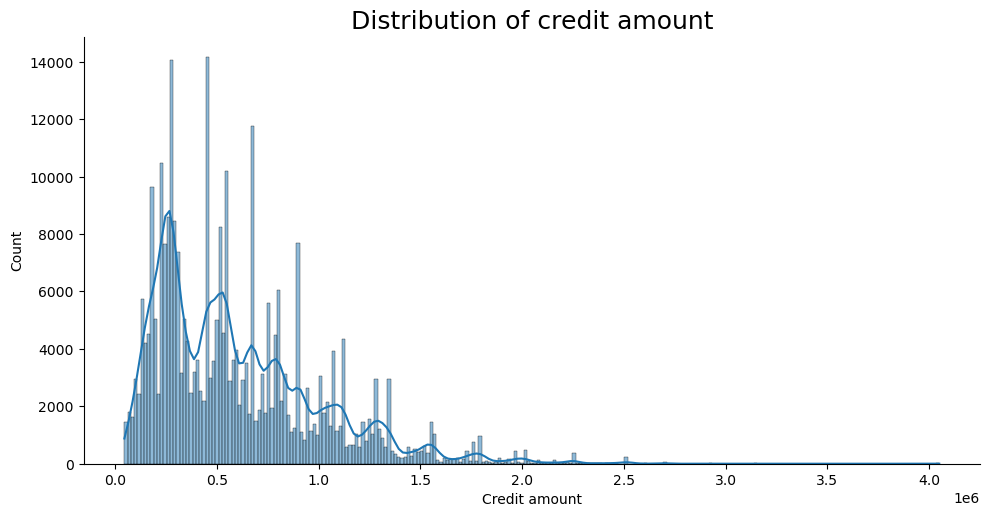

In [41]:
sns.displot(data=train, x="AMT_CREDIT", kde=True,height=5, aspect=2)
plt.title("Distribution of credit amount",fontsize=18)
plt.xlabel("Credit amount")
plt.show()

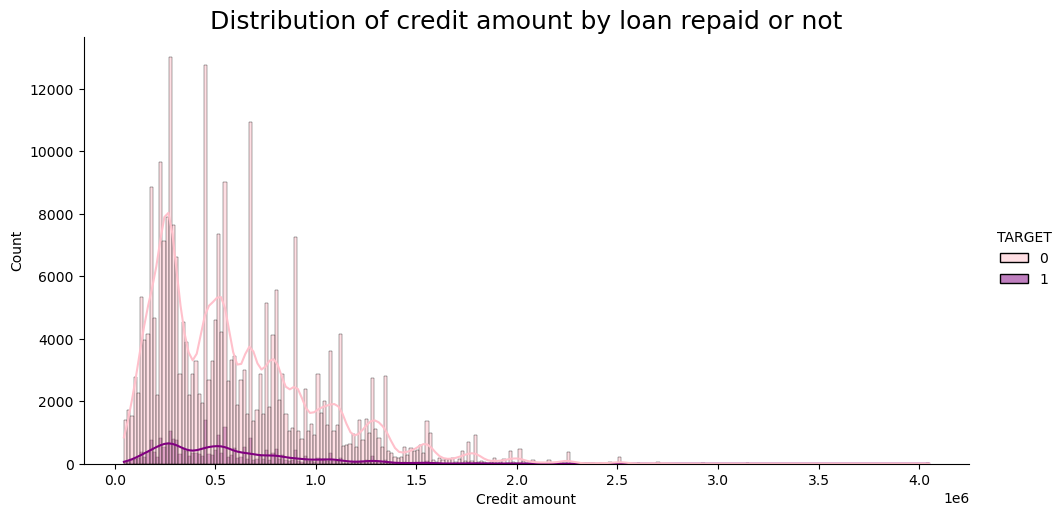

In [42]:
sns.displot(data=train, x="AMT_CREDIT",hue="TARGET", kde=True,height=5, aspect=2,palette=['pink', 'purple'])
plt.title("Distribution of credit amount by loan repaid or not",fontsize=18)
plt.xlabel("Credit amount")
plt.show()

### Distribution of total income

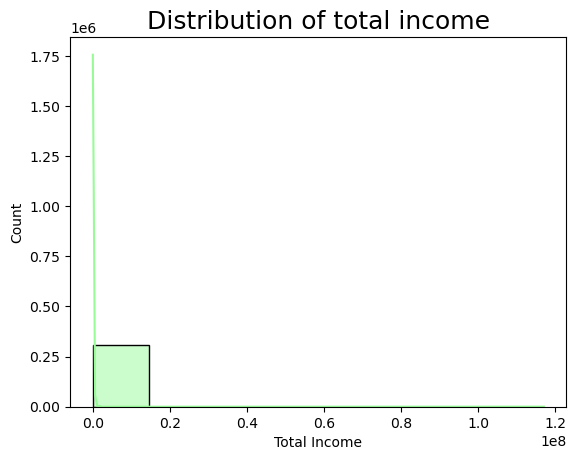

In [43]:
sns.histplot(data=train, x="AMT_INCOME_TOTAL",bins=8,kde=True,color="palegreen")
plt.title("Distribution of total income",fontsize=18)
plt.xlabel("Total Income")
plt.show()

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Count'>

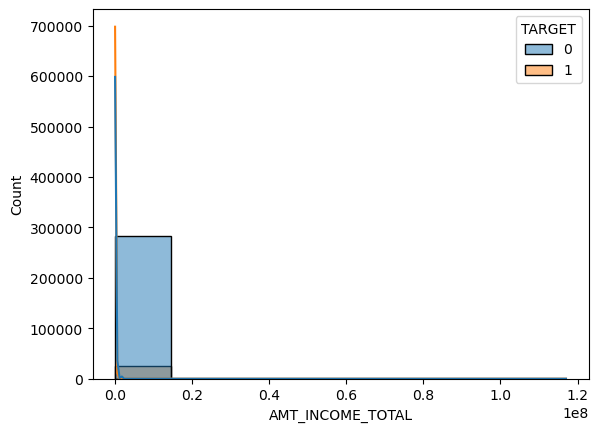

In [44]:
sns.histplot(data=train, x="AMT_INCOME_TOTAL",bins=8,kde=True,color="palegreen",hue="TARGET")

### Distribution of goods price

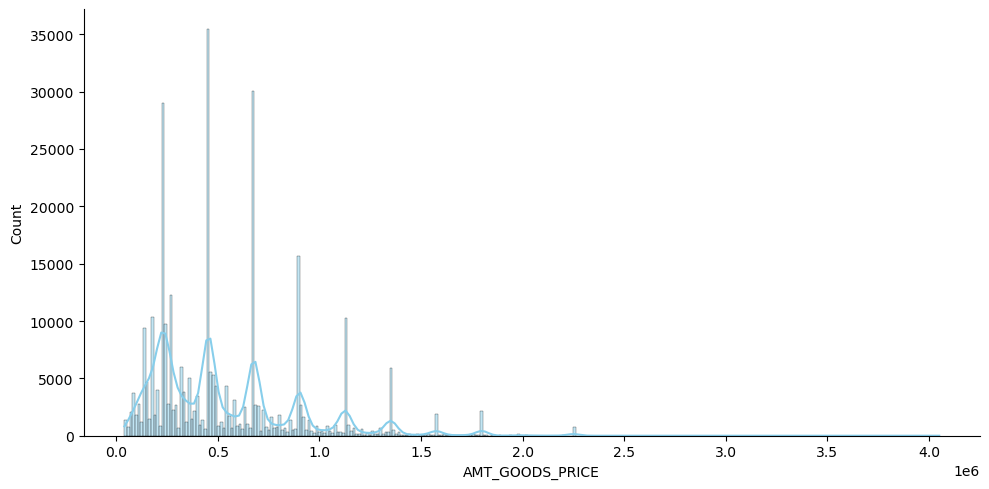

In [45]:
sns.displot(data=train, x="AMT_GOODS_PRICE", color="skyblue",kde=True, height=5, aspect=2)
plt.show()

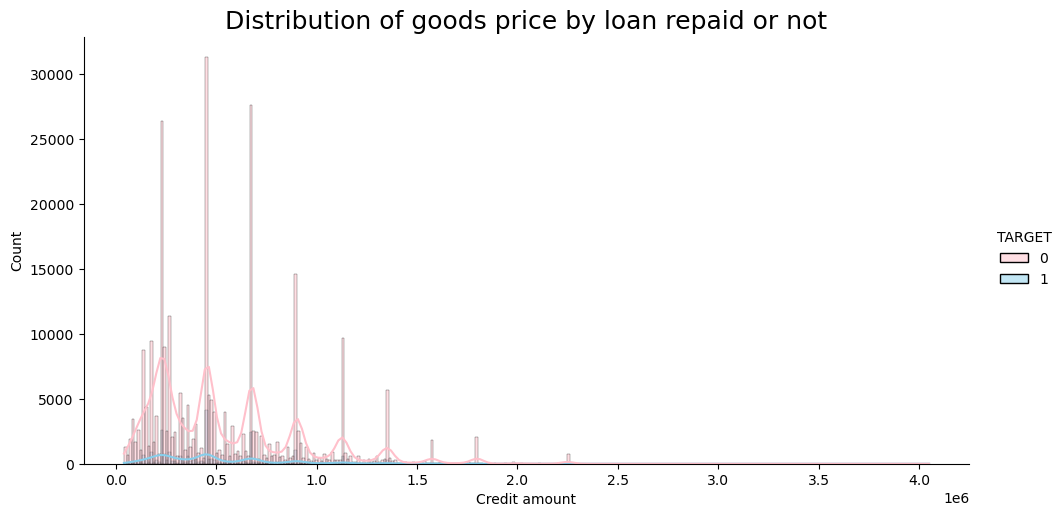

In [46]:
sns.displot(data=train, x="AMT_GOODS_PRICE",hue="TARGET", kde=True,height=5, aspect=2,palette=['pink', 'skyblue'])
plt.title("Distribution of goods price by loan repaid or not",fontsize=18)
plt.xlabel("goods price amount")
plt.show()

### Distibution of annuity

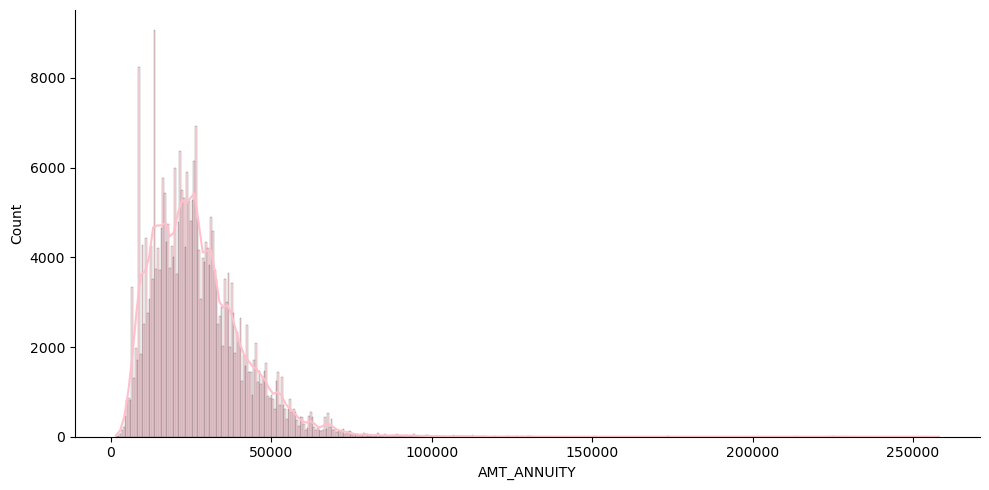

In [47]:
sns.displot(data=train, x="AMT_ANNUITY", color="pink", kde=True,height=5, aspect=2)
plt.show()

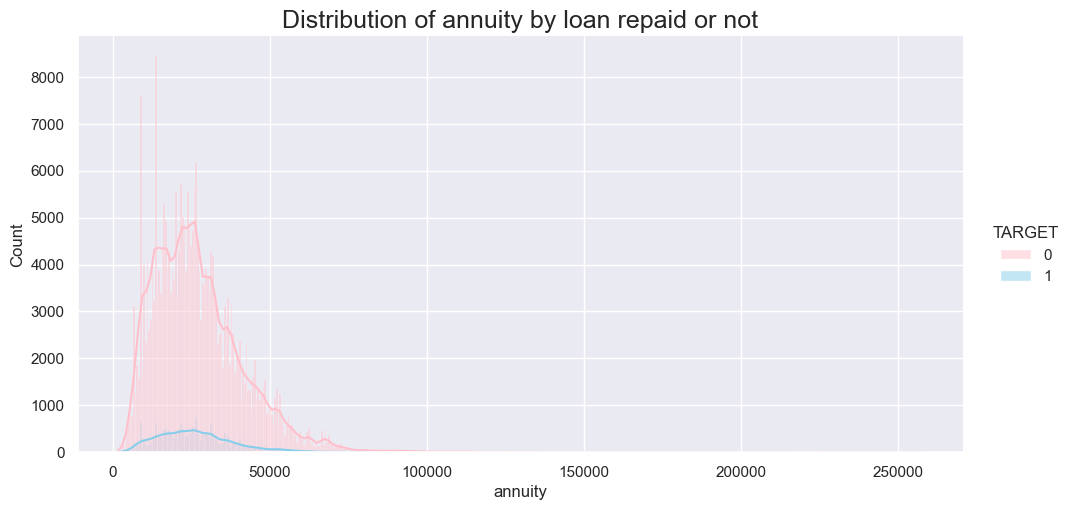

In [191]:
sns.displot(data=train, x="AMT_ANNUITY",hue="TARGET", kde=True,height=5, aspect=2,palette=['pink', 'skyblue'])
plt.title("Distribution of annuity by loan repaid or not",fontsize=18)
plt.xlabel("annuity")
plt.show()

# Checking something - maybe to do more plots?

In [48]:
#checking how many times a goods price exceeds the amount of credit
AMT_GOODS_PRICE_greater_than_AMT_CREDIT=train[train["AMT_CREDIT"]<train["AMT_GOODS_PRICE"]]
print(len(AMT_GOODS_PRICE_greater_than_AMT_CREDIT))
AMT_GOODS_PRICE_greater_than_AMT_CREDIT[AMT_GOODS_PRICE_greater_than_AMT_CREDIT["NAME_CONTRACT_TYPE"]=="Revolving loans"].head()
#all of the data is revolving loan



260


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1942,0,Revolving loans,M,Y,Y,0,540000.000,315000.000,15750.000,450000.000,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.073,-12613,-2747,-3410.000,-4383,5.000,1,1,1,1,0,0,Managers,2.000,1,1,0,0,0,0,0,0,Trade: type 2,0.343,0.735,0.671,0.073,0.036,0.975,0.660,0.074,0.040,0.035,0.333,0.375,0.000,0.060,0.050,0.000,0.004,0.075,0.037,0.975,0.673,0.075,0.040,0.035,0.333,0.375,0.000,0.065,0.052,0.000,0.005,0.074,0.036,0.975,0.664,0.075,0.040,0.035,0.333,0.375,0.000,0.061,0.051,0.000,0.005,reg oper account,block of flats,0.041,Block,No,5.000,0.000,5.000,0.000,-127.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,2.000,2.000
2138,0,Revolving loans,M,Y,Y,0,112500.000,135000.000,6750.000,202500.000,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.019,-13033,-1108,-1675.000,-4613,10.000,1,1,0,1,0,0,Laborers,2.000,2,2,0,0,0,0,1,1,Other,0.172,0.578,0.731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000,0.000,2.000,0.000,-355.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,4.000
2808,0,Revolving loans,M,N,Y,0,189000.000,337500.000,16875.000,540000.000,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.017,-19293,-1149,-4332.000,-2820,NaN,1,1,0,1,1,0,Sales staff,2.000,2,2,0,0,0,1,1,0,Self-employed,NaN,0.464,0.694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.000,-620.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,1.000,4.000
3769,0,Revolving loans,M,Y,Y,0,112500.000,135000.000,6750.000,3

In [49]:
AMT_GOODS_PRICE_lower_than_AMT_CREDIT=train[train["AMT_CREDIT"]>train["AMT_GOODS_PRICE"]]
AMT_GOODS_PRICE_lower_than_AMT_CREDIT[AMT_GOODS_PRICE_lower_than_AMT_CREDIT["NAME_CONTRACT_TYPE"]=="Revolving loans"].head()


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
2612,0,Revolving loans,M,Y,Y,1,202500.000,360000.000,18000.000,337500.000,Unaccompanied,Working,Higher education,Civil marriage,House / apartment,0.029,-10885,-2143,-4664.000,-3450,3.000,1,1,1,1,0,0,Sales staff,3.000,2,2,0,0,0,1,1,0,Trade: type 2,NaN,0.254,0.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,0.000,1.000,0.000,-46.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,2.000,0.000
5202,0,Revolving loans,F,N,Y,0,90000.000,450000.000,22500.000,225000.000,Family,State servant,Higher education,Separated,House / apartment,0.002,-16462,-2047,-2808.000,-1,NaN,1,1,1,1,0,0,Core staff,1.000,3,3,0,0,0,0,0,0,Other,NaN,0.525,0.129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000,0.000,4.000,0.000,-173.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,5.000
5846,0,Revolving loans,F,N,Y,0,81000.000,225000.000,11250.000,135000.000,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.018,-22391,365243,-4399.000,-1553,NaN,1,0,0,1,0,0,NaN,2.000,3,3,0,0,0,0,0,0,XNA,NaN,0.630,0.243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.000,-1218.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,4.000
8861,0,Revolving loans,F,Y,Y,2,216000.000,157500.000,7875.000,112500.000,Unaccompanied,State servant,Higher education,Married,House / apartment,0.009,-12288,-775,-286.000,-4506,17.000,1,1,1,1,1,0,NaN,4.000,2,2,0,0

Everyone applied for a loan only once, so there is no duplicate in ID.